In [1]:
from disaggregator import config, data, spatial, temporal, plot
import pandas as pd
import matplotlib.pyplot as plt

# Power by 'Time Use Survey' (ZVE, only 2015)

Get spatial data in [MWh] that shall be disaggregated temporally

In [2]:
df_spat = spatial.disagg_households_power("population", weight_by_income=True) * 1e3
df_spat

2025-09-25 14:26:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:26:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:26:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:26:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of t

nuts3
DE111    1.162713e+06
DE112    6.942694e+05
DE113    9.678796e+05
DE114    4.479099e+05
DE115    9.955292e+05
             ...     
DEG0K    1.156523e+05
DEG0L    1.437641e+05
DEG0M    1.262784e+05
DEG0N    5.985672e+04
DEG0P    1.821599e+05
Name: value, Length: 401, dtype: float64

Calculate temporal distribution keys based on the ZVE. They will be saved in your `data_out` folder. This step can take up to 60 Minutes but is only necessary once.

In [3]:
temporal.make_zve_load_profiles()

2025-09-25 14:26:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:26:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:26:18 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:26:18 disaggregator.data: INFO     Downloading shape NUTS-3 data for year 2016.


/home/rhindrikson/miniforge3/envs/disag/lib/python3.11/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
2025-09-25 14:26:39 disaggregator.config: WARNING  Indices not common to both dataframes: {'DEB1D', 'DEB16', 'DEB1C', 'DE80O', 'DE80M', 'DE80K', 'DEB19', 'DE80J', 'DE80N', 'DE80L'}
2025-09-25 14:26:39 disaggregator.temporal: WARNING  The following regions are excluded from DE due to missing household data: ['DE80J', 'DE80K', 'DE80L', 'DE80M', 'DE80N', 'DE80O', 'DEB1C', 'DEB1D']
Creating ZVE-profiles: 100%|███████████████████████| 393/393 [12:04<00:00,  1.84s/it]


nuts3,DE600,DE711,DE712,DE713,DE714,DE715,DE737,DE803,DE804,DE80L,...,DEG07,DEG0P,DEF0B,DEF0C,DEF0D,DEF0E,DEF0F,DEG0L,DEG0M,DEG0N
2015-01-01 00:00:00,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,NaN,...,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053
2015-01-01 01:00:00,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,NaN,...,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045
2015-01-01 02:00:00,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,NaN,...,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042
2015-01-01 03:00:00,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,NaN,...,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041
2015-01-01 04:00:00,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,NaN,...,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,0.000187,0.000189,0.000189,0.000189,0.000189,0.000189,0.000188,0.000187,0.000187,NaN,...,0.000188,0.000189,0.000187,0.000187,0.000187,0.000187,0.000187,0.000188,0.000188,0.000189
2015-12-31 20:00:00,0.00018,0.000182,0.000182,0.000182,0.000182,0.000182,0.000181,0.00018,0.00018,NaN,...,0.000181,0.000182,0.00018,0.00018,0.00018,0.00018,0.00018,0.000181,0.000181,0.000181
2015-12-31 21:00:00,0.00017,0.000172,0.000172,0.000172,0.000172,0.000172,0.000171,0.00017,0.00017,NaN,...,0.000171,0.000171,0.00017,0.000169,0.00017,0.00017,0.00017,0.000171,0.000171,0.000171
2015-12-31 22:00:00,0.000128,0.000129,0.000129,0.000129,0.000129,0.00013,0.000129,0.000128,0.000128,NaN,...,0.000129,0.000129,0.000128,0.000128,0.000128,0.000128,0.000128,0.000129,0.000129,0.000129


Then load the temporal distribution keys based on the ZVE:

In [4]:
df_temp = pd.read_csv(
    config.data_out("ZVE_timeseries_AllRegions_2015.csv"),
    engine="c",
    index_col=0,
    parse_dates=True,
    infer_datetime_format=True,
).pipe(data.transpose_spatiotemporal)
df_temp

/tmp/ipykernel_27962/2488703108.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_temp = pd.read_csv(


,0,1,2,3,4,5,6,7,8,9,...,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
DE600,0.000053,0.000045,0.000042,0.000041,0.000047,0.000075,0.000132,0.000141,0.000131,0.000128,...,0.000120,0.000126,0.000141,0.000174,0.000186,0.000187,0.000180,0.000170,0.000128,0.000078
DE711,0.000053,0.000045,0.000042,0.000041,0.000047,0.000076,0.000133,0.000142,0.000131,0.000126,...,0.000113,0.000123,0.000140,0.000174,0.000187,0.000189,0.000182,0.000172,0.000129,0.000079
DE712,0.000053,0.000045,0.000042,0.000041,0.000047,0.000076,0.000133,0.000142,0.000131,0.000126,...,0.000113,0.000123,0.000140,0.000174,0.000187,0.000189,0.000182,0.000172,0.000129,0.000079
DE713,0.000053,0.000045,0.000042,0.000041,0.000047,0.000076,0.000133,0.000142,0.000131,0.000126,...,0.000113,0.000123,0.000140,0.000174,0.000187,0.000189,0.000182,0.000172,0.000129,0.000079
DE714,0.000053,0.000045,0.000042,0.000041,0.000047,0.000076,0.000133,0.000142,0.000131,0.000126,...,0.000113,0.000123,0.000140,0.000174,0.000187,0.000189,0.000182,0.000172,0.000129,0.000079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEF0E,0.000053,0.000045,0.000042,0.000041,0.000047,0.000075,0.000132,0.000141,0.000131,0.000129,...,0.000121,0.000126,0.000141,0.000174,0.000186,0.000187,0.000180,0.000170,0.000128,0.000078
DEF0F,0.000053,0.000045,0.000042,0.000041,0.000047,0.000075,0.000132,0.000141,0.000131,0.000128,...,0.000121,0.000126,0.000141,0.000174,0.000186,0.000187,0.000180,0.000170,0.000128,0.000078
DEG0L,0.000053,0.000045,0.000042,0.000041,0.000047,0.000076,0.000133,0.000141,0.000130,0.000125,...,0.000117,0.000125,0.000141,0.000175,0.000187,0.000188,0.000181,0.000171,0.000129,0.000078
DEG0M,0.000053,0.000045,0.000042,0.000041,0.000047,0.000076,0.000132,0.000141,0.000130,0.000125,...,0.000118,0.000125,0.000142,0.000175,0.000187,0.000188,0.000181,0.000171,0.000129,0.000078


The function `temporal.disagg_temporal()` needs two inputs:
1. **a spatial dataset**  
    either as `pd.Series` or `pd.DataFrame`: in both cases _NUTS-3-index'ed_


2. **a temporal dataset**  
    if passed as `pd.DataFrame`: _NUTS-3-index'ed_  
    if passed as `pd.Series`: _pd.DateTimeIndex'ed_

Pre-check:
* Both `df_spat` and `df_temp` are `pd.DataFrame`s
* Both have NUTS-3-indices.

So now we can directly perfom the disaggregation:

In [5]:
df_elc_tempo_ZVE = temporal.disagg_temporal(df_spat, df_temp)
df_elc_tempo_ZVE

,0,1,2,3,4,5,6,7,8,9,...,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
DE111,61.963656,52.000981,48.922454,47.416866,54.929391,88.254918,154.710011,165.227674,151.937998,144.159071,...,129.573649,142.367245,163.023004,202.983581,217.934010,220.136230,211.993734,200.220722,150.798173,91.584794
DE112,37.003866,31.052472,29.213618,28.314188,32.801413,52.706360,92.398241,98.708399,90.796249,86.142847,...,77.340697,84.866660,97.262635,121.229908,130.120787,131.479212,126.618833,119.587877,90.066974,54.698012
DE113,51.577346,43.285877,40.723649,39.470631,45.723327,73.460668,128.772827,137.525999,126.349707,119.688903,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DE114,23.867618,20.031137,18.845547,18.265779,21.159039,33.993807,59.588358,63.583345,58.395865,55.262865,...,49.953969,54.937000,62.854378,78.270897,83.963738,84.784334,81.646676,77.112005,58.078681,35.274662
DE115,53.049612,44.521879,41.886602,40.597920,47.028893,75.556861,132.446043,141.488305,130.155581,123.660491,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEG0K,6.150287,5.166556,4.862114,4.713572,5.456851,8.754906,15.334453,16.331344,15.030175,14.405632,...,13.425973,14.454372,16.344654,20.213688,21.610053,21.802599,20.988268,19.820491,14.932958,9.076802
DEG0L,7.643702,6.421704,6.043469,5.858966,6.782445,10.880166,19.055370,20.288377,18.666928,17.909756,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DEG0M,6.711867,5.639677,5.307734,5.145873,5.956380,9.552947,16.728788,17.805765,16.389120,15.732091,...,14.882035,15.826184,17.871905,22.063075,23.579213,23.780761,22.890461,21.616261,16.287221,9.901973
DEG0N,3.183014,2.673931,2.516379,2.439514,2.824171,4.530936,7.935933,8.473538,7.825725,7.539578,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


We see that the data has successfully been disaggregated.  
However, regions are in rows and time-steps are in columns -- this is not really intuitive. Better would be the other way round, right? We can achieve this by passing `time_indexed=True` to give us a transponed version:

In [6]:
df_elc_tempo_ZVE = temporal.disagg_temporal(df_spat, df_temp, time_indexed=True)
df_elc_tempo_ZVE

,DE111,DE112,DE113,DE114,DE115,DE116,DE117,DE118,DE119,DE11A,...,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M,DEG0N,DEG0P
0,61.963656,37.003866,51.577346,23.867618,53.049612,40.717331,15.803291,31.796530,10.019867,17.370128,...,8.010078,6.131861,4.426170,8.207341,6.405845,6.150287,7.643702,6.711867,3.183014,9.687897
1,52.000981,31.052472,43.285877,20.031137,44.521879,34.174616,13.264573,26.689653,8.411566,14.581630,...,6.728844,5.151676,3.717838,6.894357,5.382209,5.166556,6.421704,5.639677,2.673931,8.137995
2,48.922454,29.213618,40.723649,18.845547,41.886602,32.152524,12.479898,25.111105,7.914346,13.719577,...,6.332336,4.848278,3.498660,6.488041,5.065329,4.862114,6.043469,5.307734,2.516379,7.658369
3,47.416866,28.314188,39.470631,18.265779,40.597920,31.163856,12.096301,24.339490,7.671366,13.298281,...,6.138876,4.700290,3.391695,6.289779,4.910789,4.713572,5.858966,5.145873,2.439514,7.424340
4,54.929391,32.801413,45.723327,21.159039,47.028893,36.098634,14.011287,28.191978,8.884912,15.402230,...,7.106929,5.441062,3.926782,7.281765,5.684498,5.456851,6.782445,5.956380,2.824171,8.595301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,220.136230,131.479212,0.000000,84.784334,0.000000,144.618869,0.000000,112.912108,0.000000,61.670358,...,28.395788,21.731743,0.000000,29.096915,0.000000,21.802599,0.000000,23.780761,0.000000,34.346396
8756,211.993734,126.618833,0.000000,81.646676,0.000000,139.263524,0.000000,108.727370,0.000000,59.382643,...,27.335257,20.919145,0.000000,28.010498,0.000000,20.988268,0.000000,22.890461,0.000000,33.064109
8757,200.220722,119.587877,0.000000,77.112005,0.000000,131.527871,0.000000,102.686898,0.000000,56.082992,...,25.814353,19.754959,0.000000,26.452108,0.000000,19.820491,0.000000,21.616261,0.000000,31.224590
8758,150.798173,90.066974,0.000000,58.078681,0.000000,99.065363,0.000000,77.344847,0.000000,42.243630,...,19.448758,14.884160,0.000000,19.929058,0.000000,14.932958,0.000000,16.287221,0.000000,23.524564


So let's take out one region, e.g. Berlin (DE300), and plot it as a line graph:

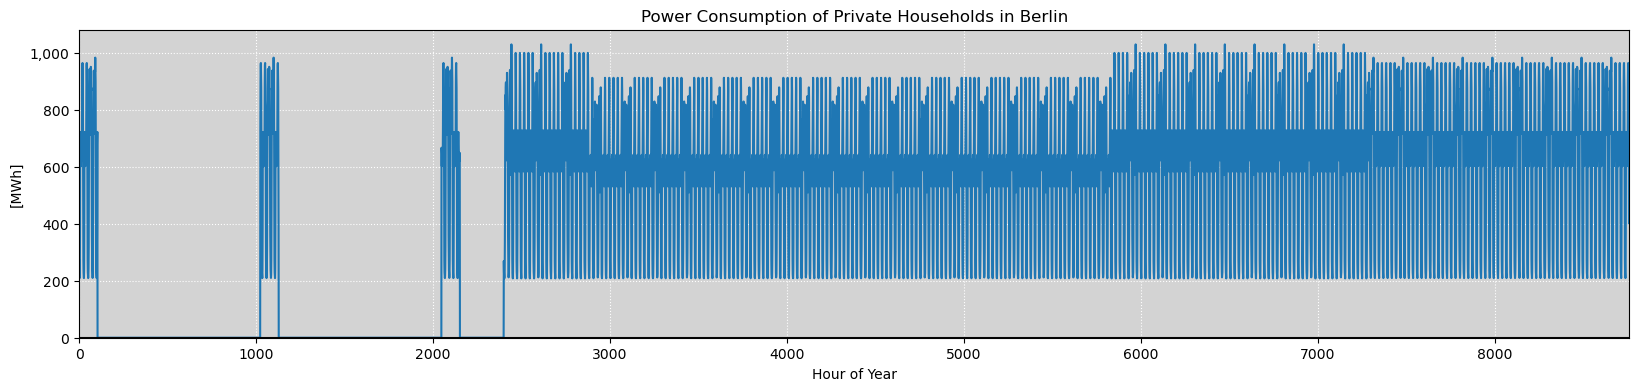

In [7]:
fig, ax = plt.subplots(figsize=(20, 4))
df_elc_tempo_ZVE["DE300"].plot(ax=ax)
plot.set_ax_format(
    ax=ax,
    xlim=(0, 8760),
    ylim=(0, None),
    ylabel="[MWh]",
    xlabel="Hour of Year",
    axtitle="Power Consumption of Private Households in Berlin",
)

This depictation however does not provide a good visualization of what is happening on shorter timescales, i.e. within one day.

Therefore, we choose to plot it as a heatmap:

2025-09-25 14:38:46 disaggregator.plot: WARNING  This is currently buggy and may distort your figure!


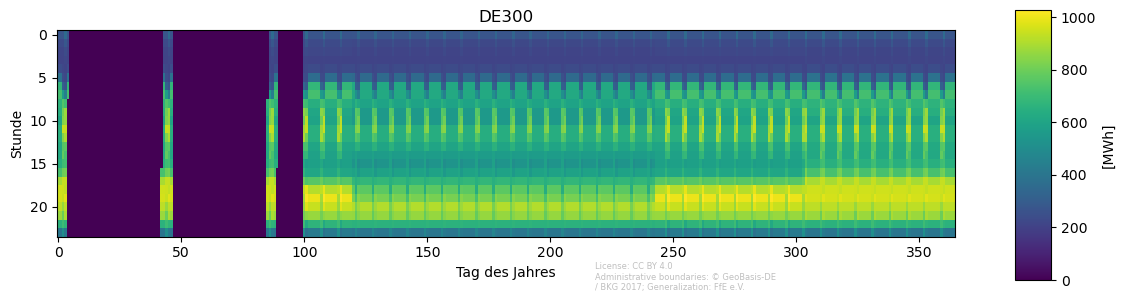

In [8]:
fig, ax = plot.heatmap_timeseries(df_elc_tempo_ZVE["DE300"], clabel="[MWh]")

# Power by 'Standard Load Profiles' (SLP, all years)
update Dec 2020

In [9]:
df_elec_temp_slp = temporal.disagg_temporal_power_housholds_slp(
    use_nuts3code=True, by="population", weight_by_income=False, year=2011
)

2025-09-25 14:38:46 disaggregator.data: INFO     Requesting data from https://api.opendata.ffe.de/demandregio/demandregio_spatial?id_spatial=2&year=2011 (attempt 1/6)
2025-09-25 14:39:02 disaggregator.data: INFO     Requesting data from https://api.opendata.ffe.de/demandregio/demandregio_spatial?id_spatial=48&year=2011 (attempt 1/6)


2025-09-25 14:39:02 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:39:02 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:39:02 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:39:02 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of t

2025-09-25 14:39:02 disaggregator.temporal: INFO     Working on state: SH.
2025-09-25 14:39:02 disaggregator.temporal: INFO     ... creating state-specific load-profiles
2025-09-25 14:39:04 disaggregator.temporal: INFO     ... assigning load-profiles
2025-09-25 14:39:04 disaggregator.temporal: INFO     Working on state: HH.
2025-09-25 14:39:04 disaggregator.temporal: INFO     ... creating state-specific load-profiles
2025-09-25 14:39:05 disaggregator.temporal: INFO     ... assigning load-profiles
2025-09-25 14:39:05 disaggregator.temporal: INFO     Working on state: NI.
2025-09-25 14:39:05 disaggregator.temporal: INFO     ... creating state-specific load-profiles
2025-09-25 14:39:06 disaggregator.temporal: INFO     ... assigning load-profiles
2025-09-25 14:39:06 disaggregator.temporal: INFO     Working on state: HB.
2025-09-25 14:39:06 disaggregator.temporal: INFO     ... creating state-specific load-profiles
2025-09-25 14:39:08 disaggregator.temporal: INFO     ... assigning load-profi

2025-09-25 14:39:24 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


In [10]:
df_elec_temp_slp.head()

,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M,DEG0N,DEG0P
2011-01-01 00:00:00,2.585153,7.420267,6.577667,2.410314,4.167634,5.847620,5.089973,6.180564,9.282304,3.971721,...,3.438300,2.574253,1.825217,3.513850,2.643528,2.661698,3.261258,2.991682,1.302080,3.999305
2011-01-01 00:15:00,3.090176,8.869855,7.862649,2.881181,4.981803,6.989983,6.084326,7.387969,11.095650,4.747617,...,4.109990,3.077147,2.181782,4.200299,3.159955,3.181674,3.898361,3.576123,1.556449,4.780590
2011-01-01 00:30:00,2.864152,8.221088,7.287552,2.670443,4.617420,6.478716,5.639301,6.847592,10.284083,4.400363,...,3.809374,2.852076,2.022200,3.893077,2.928827,2.948957,3.613224,3.314555,1.442606,4.430924
2011-01-01 00:45:00,2.648722,7.602733,6.739413,2.469584,4.270117,5.991414,5.215137,6.332545,9.510557,4.069386,...,3.522849,2.637554,1.870099,3.600256,2.708533,2.727149,3.341453,3.065248,1.334099,4.097649
2011-01-01 01:00:00,2.440356,7.004651,6.209246,2.275310,3.934201,5.520089,4.804879,5.834385,8.762393,3.749261,...,3.245718,2.430067,1.722985,3.317036,2.495462,2.512613,3.078592,2.824115,1.229150,3.775300


... and can then be plotted directly:

/tmp/ipykernel_27962/1442032728.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_elec_temp_slp.resample("H").sum()["DE300"], clabel="[MWh]"
2025-09-25 14:39:24 disaggregator.plot: WARNING  This is currently buggy and may distort your figure!


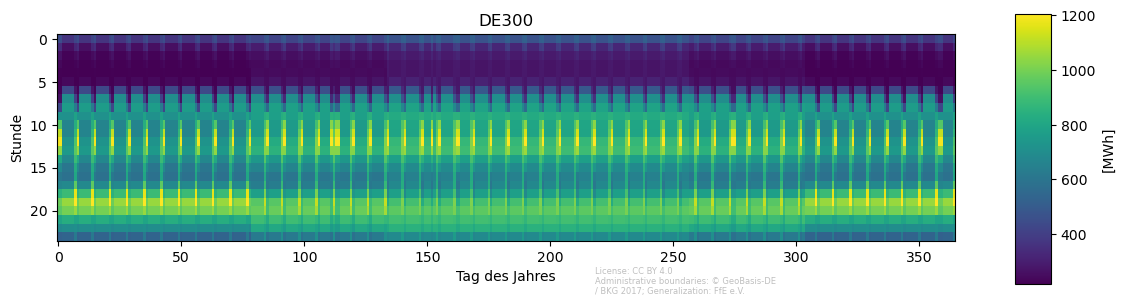

In [11]:
fig, ax = plot.heatmap_timeseries(
    df_elec_temp_slp.resample("H").sum()["DE300"], clabel="[MWh]"
)

# Gas by 'Standard Load Profiles' (SLP, all years)
update Dec 2020

Use ``disagg_temporal_gas_households()`` to get hourly gas demand of household per region in **MWh**. Function uses spatial function ``disagg_households_gas()``, which distinguishes between gas demand for heating, cooking and warm water. However, demands are summed up for SLP.
Demands are then split between demand for _single family houses (EFH)_ and _multi family houses (MFH)_ with the help of ``data.percentage_EFH_MFH()``, which calculates the percentages of EFH and MFH per NUTS-3 based on the available living spaces.

In [12]:
# use function disagg_daily_gas_slp_households similar as for CTS to create gas SLP for all years
# specify year either through config file (restart kernel after) or specify directly in function
df_households_gas = temporal.disagg_temporal_gas_households(
    use_nuts3code=True, year=2016
)

2025-09-25 14:39:24 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:39:24 disaggregator.data: INFO     Requesting data from https://api.opendata.ffe.de/demandregio/demandregio_temporal?year_base=2016&year_weather=2016&id_temporal=12&year=2016&internal_id_1=1 (attempt 1/6)


2025-09-25 14:39:51 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:39:52 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:39:52 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
2025-09-25 14:39:52 disaggregator.temporal: INFO     Working on state: SH.
2025-09-25 14:39:52 disaggregator.data: INFO     Requesting data from https://api.opendata.ffe.de/demandregio/demandregio_spatial?id_spatial=35&year=2016 (attempt 1/6)


/home/rhindrikson/all/repos/demandregio/disaggregator/data.py:1648: FutureWarning: Non-integer 'periods' in pd.date_range, pd.timedelta_range, pd.period_range, and pd.interval_range are deprecated and will raise in a future version.
  date=pd.date_range(


2025-09-25 14:39:52 disaggregator.data: INFO     Using living space data for year 2018.


2025-09-25 14:39:56 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:39:57 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:39:57 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:39:57 disaggregator.data: INFO     Requesting data from https://api.opendata.ffe.de/demandregio/demandregio_spatial?id_spatial=48&year=2016 (attempt 1/6)


2025-09-25 14:39:57 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:39:57 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:39:57 disaggregator.data: INFO     Requesting data from https://api.opendata.ffe.de/demandregio/demandregio_spatial?id_spatial=41&year=2016 (attempt 1/6)


2025-09-25 14:39:58 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:39:58 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:39:58 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:39:58 disaggregator.spatial: INFO     Calculating regional gas demands top-down.
2025-09-25 14:39:58 disaggregator.data: INFO     Requesting data from https://api.opendata.ffe.de/demandregio/demandregio_spatial?id_spatial=61&year=2011 (attempt 1/6)


2025-09-25 14:39:58 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:39:58 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:39:58 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:39:58 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:39:58 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:39:58 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:39:58 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:39:58 disaggregator.temporal: INFO     ... creating state-specific load-profiles


2025-09-25 14:39:58 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:00 disaggregator.temporal: INFO     Working on state: HH.
2025-09-25 14:40:00 disaggregator.data: INFO     Using living space data for year 2018.


2025-09-25 14:40:03 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:04 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:04 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:04 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:04 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:04 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:04 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of t

2025-09-25 14:40:04 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:40:04 disaggregator.spatial: INFO     Calculating regional gas demands top-down.


2025-09-25 14:40:04 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:04 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:04 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:04 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:04 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:04 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:04 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:04 disaggregator.temporal: INFO     ... creating state-specific load-profiles


2025-09-25 14:40:04 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:04 disaggregator.temporal: INFO     Working on state: NI.
2025-09-25 14:40:04 disaggregator.data: INFO     Using living space data for year 2018.


2025-09-25 14:40:08 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:08 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:08 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:08 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:08 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:08 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:08 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of t

2025-09-25 14:40:08 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:40:08 disaggregator.spatial: INFO     Calculating regional gas demands top-down.


2025-09-25 14:40:08 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:08 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:08 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:08 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:08 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:08 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:08 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:09 disaggregator.temporal: INFO     ... creating state-specific load-profiles


2025-09-25 14:40:09 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:13 disaggregator.temporal: INFO     Working on state: HB.
2025-09-25 14:40:13 disaggregator.data: INFO     Using living space data for year 2018.


2025-09-25 14:40:17 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:18 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of t

2025-09-25 14:40:18 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:40:18 disaggregator.spatial: INFO     Calculating regional gas demands top-down.


2025-09-25 14:40:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:18 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:18 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:18 disaggregator.temporal: INFO     ... creating state-specific load-profiles


2025-09-25 14:40:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:18 disaggregator.temporal: INFO     Working on state: NW.
2025-09-25 14:40:18 disaggregator.data: INFO     Using living space data for year 2018.


2025-09-25 14:40:22 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:22 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:22 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:22 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:22 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:22 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:22 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of t

2025-09-25 14:40:22 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:40:22 disaggregator.spatial: INFO     Calculating regional gas demands top-down.


2025-09-25 14:40:22 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:22 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:22 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:22 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:22 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:22 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:22 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:22 disaggregator.temporal: INFO     ... creating state-specific load-profiles


2025-09-25 14:40:22 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:28 disaggregator.temporal: INFO     Working on state: HE.
2025-09-25 14:40:28 disaggregator.data: INFO     Using living space data for year 2018.


2025-09-25 14:40:32 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:32 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:32 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:32 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:32 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:32 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:32 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of t

2025-09-25 14:40:32 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:40:32 disaggregator.spatial: INFO     Calculating regional gas demands top-down.


2025-09-25 14:40:32 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:32 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:32 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:32 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:32 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:32 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:32 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:32 disaggregator.temporal: INFO     ... creating state-specific load-profiles


2025-09-25 14:40:32 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:35 disaggregator.temporal: INFO     Working on state: RP.
2025-09-25 14:40:35 disaggregator.data: INFO     Using living space data for year 2018.


2025-09-25 14:40:39 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:40 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:40 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:40 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:40 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:40 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:40 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of t

2025-09-25 14:40:40 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:40:40 disaggregator.spatial: INFO     Calculating regional gas demands top-down.


2025-09-25 14:40:40 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:40 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:40 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:40 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:40 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:40 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:40 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:40 disaggregator.temporal: INFO     ... creating state-specific load-profiles


2025-09-25 14:40:40 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:44 disaggregator.temporal: INFO     Working on state: BW.
2025-09-25 14:40:44 disaggregator.data: INFO     Using living space data for year 2018.


2025-09-25 14:40:48 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:48 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:48 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:48 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:48 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:48 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:48 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of t

2025-09-25 14:40:48 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:40:48 disaggregator.spatial: INFO     Calculating regional gas demands top-down.


2025-09-25 14:40:48 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:48 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:48 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:48 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:48 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:48 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:48 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:48 disaggregator.temporal: INFO     ... creating state-specific load-profiles


2025-09-25 14:40:48 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:54 disaggregator.temporal: INFO     Working on state: BY.
2025-09-25 14:40:54 disaggregator.data: INFO     Using living space data for year 2018.


2025-09-25 14:40:58 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:59 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:59 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:59 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:59 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:59 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:59 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of t

2025-09-25 14:40:59 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:40:59 disaggregator.spatial: INFO     Calculating regional gas demands top-down.


2025-09-25 14:40:59 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:59 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:59 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:59 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:40:59 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:59 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:40:59 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:40:59 disaggregator.temporal: INFO     ... creating state-specific load-profiles


2025-09-25 14:40:59 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:09 disaggregator.temporal: INFO     Working on state: SL.
2025-09-25 14:41:09 disaggregator.data: INFO     Using living space data for year 2018.


2025-09-25 14:41:13 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:13 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:13 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:13 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:13 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:13 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:13 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of t

2025-09-25 14:41:13 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:41:13 disaggregator.spatial: INFO     Calculating regional gas demands top-down.


2025-09-25 14:41:13 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:13 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:13 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:13 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:13 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:13 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:13 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:13 disaggregator.temporal: INFO     ... creating state-specific load-profiles


2025-09-25 14:41:13 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:14 disaggregator.temporal: INFO     Working on state: BE.
2025-09-25 14:41:14 disaggregator.data: INFO     Using living space data for year 2018.


2025-09-25 14:41:18 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:19 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:19 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:19 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:19 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:19 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:19 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of t

2025-09-25 14:41:19 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:41:19 disaggregator.spatial: INFO     Calculating regional gas demands top-down.


2025-09-25 14:41:19 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:19 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:19 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:19 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:19 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:19 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:19 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:19 disaggregator.temporal: INFO     ... creating state-specific load-profiles


2025-09-25 14:41:19 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:19 disaggregator.temporal: INFO     Working on state: BB.
2025-09-25 14:41:19 disaggregator.data: INFO     Using living space data for year 2018.


2025-09-25 14:41:23 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:24 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:24 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:24 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:24 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:24 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:24 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of t

2025-09-25 14:41:24 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:41:24 disaggregator.spatial: INFO     Calculating regional gas demands top-down.


2025-09-25 14:41:24 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:24 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:24 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:24 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:24 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:24 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:24 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:24 disaggregator.temporal: INFO     ... creating state-specific load-profiles


2025-09-25 14:41:24 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:26 disaggregator.temporal: INFO     Working on state: MV.
2025-09-25 14:41:26 disaggregator.data: INFO     Using living space data for year 2018.


2025-09-25 14:41:29 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:30 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:30 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:30 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:30 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:30 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:30 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of t

2025-09-25 14:41:30 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:41:30 disaggregator.spatial: INFO     Calculating regional gas demands top-down.


2025-09-25 14:41:30 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:30 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:30 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:30 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:30 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:30 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:30 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:30 disaggregator.temporal: INFO     ... creating state-specific load-profiles


2025-09-25 14:41:30 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:31 disaggregator.temporal: INFO     Working on state: SN.
2025-09-25 14:41:31 disaggregator.data: INFO     Using living space data for year 2018.


2025-09-25 14:41:35 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:36 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:36 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:36 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:36 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:36 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:36 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of t

2025-09-25 14:41:36 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:41:36 disaggregator.spatial: INFO     Calculating regional gas demands top-down.


2025-09-25 14:41:36 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:36 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:36 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:36 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:36 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:36 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:36 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:36 disaggregator.temporal: INFO     ... creating state-specific load-profiles


2025-09-25 14:41:36 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:37 disaggregator.temporal: INFO     Working on state: ST.
2025-09-25 14:41:37 disaggregator.data: INFO     Using living space data for year 2018.


2025-09-25 14:41:41 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:42 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:42 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:42 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:42 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:42 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:42 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of t

2025-09-25 14:41:42 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:41:42 disaggregator.spatial: INFO     Calculating regional gas demands top-down.


2025-09-25 14:41:42 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:42 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:42 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:42 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:42 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:42 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:42 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:42 disaggregator.temporal: INFO     ... creating state-specific load-profiles


2025-09-25 14:41:42 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:44 disaggregator.temporal: INFO     Working on state: TH.
2025-09-25 14:41:44 disaggregator.data: INFO     Using living space data for year 2018.


2025-09-25 14:41:48 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:49 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:49 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:49 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:49 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:49 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:49 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of t

2025-09-25 14:41:49 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.
2025-09-25 14:41:49 disaggregator.spatial: INFO     Calculating regional gas demands top-down.


2025-09-25 14:41:49 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:49 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:49 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:49 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:49 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:49 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


2025-09-25 14:41:49 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 14:41:49 disaggregator.temporal: INFO     ... creating state-specific load-profiles


2025-09-25 14:41:49 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 14:41:51 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


In [13]:
df_households_gas.head()

,DE111,DE112,DE113,DE114,DE115,DE116,DE117,DE118,DE119,DE11A,...,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M,DEG0N,DEG0P,DE91C
2016-01-01 00:00:00,149.151200,101.785185,144.980609,72.900915,154.754564,122.638248,37.790875,99.694237,32.806554,58.716556,...,30.703463,23.230158,43.623868,29.915757,31.095555,41.144101,28.673319,13.677095,48.422081,130.381138
2016-01-01 01:00:00,158.214107,107.286547,152.950880,76.835139,163.240936,129.425996,39.953342,104.749276,34.479517,61.738170,...,32.249525,23.839012,44.767155,30.664219,31.880115,42.215823,30.259917,14.483225,49.618545,135.987974
2016-01-01 02:00:00,160.877016,109.289325,155.767149,78.271198,166.252825,131.795844,40.664381,106.801395,35.152234,62.934755,...,32.884452,24.305602,45.643439,31.299105,32.533756,43.048575,30.814107,14.734182,50.660511,138.944363
2016-01-01 03:00:00,173.536526,117.877434,168.009905,84.421754,179.319347,142.155341,43.861949,115.188151,37.912788,67.877591,...,35.466569,26.025467,48.873048,33.459310,34.789246,46.084512,33.236169,15.893188,54.134030,149.837541
2016-01-01 04:00:00,213.980242,144.265793,205.834918,103.311108,219.656735,174.232391,53.872034,140.443512,46.240441,82.830804,...,43.225527,30.970253,58.158529,39.680972,41.283286,54.815170,40.735194,19.557653,64.142891,181.086467


plot df directly...

2025-09-25 14:41:51 disaggregator.plot: WARNING  This is currently buggy and may distort your figure!


Text(0.5, 1.0, 'Gas Load Private Households Germany')

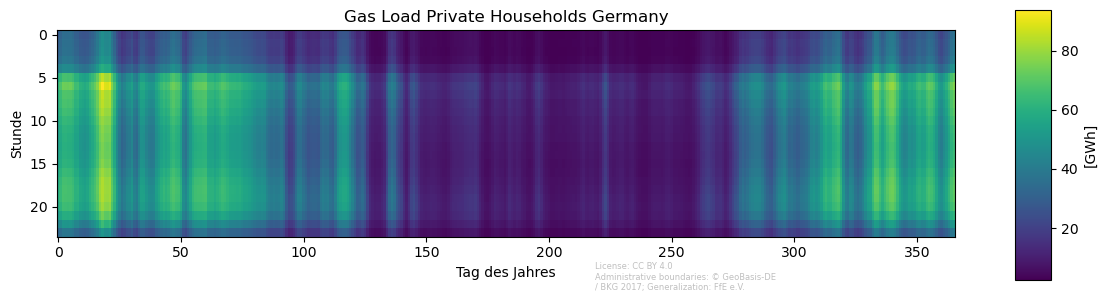

In [14]:
fig, ax = plot.heatmap_timeseries(df_households_gas.sum(axis=1) / 1e3, clabel="[GWh]")
ax[0, 0].set_title("Gas Load Private Households Germany")

### older version below

normalized gas SLP for _single family houses_ (EFH) and _multi family houses (MFH)_ have been uploaded into the database untill 2016 as well. which could be used with ``temporal.disagg_temporal(df_spat, df_temp)`` and ``data.transpose_spatiotemporal()`` to perform the same disaggregation.

In [24]:
df_gas_EFH = data.standard_load_profile_gas(typ="EFH")  # type='MFH'
df_gas_EFH

2025-09-25 15:09:06 disaggregator.data: WARNING  Using year_weather 2016 for 'slp_H0_1H_gas' data (available years: 2014, 2015, 2016).
2025-09-25 15:09:12 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 15:09:13 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 15:09:13 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


nuts3,DE111,DE112,DE113,DE114,DE115,DE116,DE117,DE118,DE119,DE11A,...,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M,DEG0N,DEG0P,DE91C
2015-01-01 00:00:00,0.000107,0.000103,0.000112,0.000104,0.000112,0.000108,0.000110,0.000112,0.000110,0.000108,...,0.000114,0.000121,0.000116,0.000117,0.000116,0.000119,0.000118,0.000108,0.000115,0.000102
2015-01-01 01:00:00,0.000109,0.000107,0.000116,0.000107,0.000116,0.000111,0.000114,0.000116,0.000114,0.000112,...,0.000118,0.000123,0.000119,0.000120,0.000119,0.000123,0.000122,0.000111,0.000119,0.000105
2015-01-01 02:00:00,0.000112,0.000108,0.000118,0.000109,0.000117,0.000113,0.000116,0.000118,0.000116,0.000113,...,0.000120,0.000127,0.000122,0.000123,0.000122,0.000125,0.000125,0.000113,0.000121,0.000108
2015-01-01 03:00:00,0.000121,0.000116,0.000127,0.000118,0.000127,0.000122,0.000125,0.000127,0.000125,0.000122,...,0.000129,0.000133,0.000131,0.000132,0.000131,0.000135,0.000134,0.000121,0.000130,0.000116
2015-01-01 04:00:00,0.000145,0.000134,0.000148,0.000139,0.000147,0.000142,0.000148,0.000146,0.000143,0.000140,...,0.000150,0.000153,0.000156,0.000156,0.000156,0.000160,0.000159,0.000143,0.000152,0.000137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01 19:00:00,0.000318,0.000293,52.173012,0.000310,52.246476,0.000335,46.980467,0.000321,0.000315,0.000294,...,0.000275,0.000214,0.000266,0.000257,0.000262,0.000258,0.000256,21.872373,0.000275,15.585107
2016-01-01 20:00:00,0.000306,0.000283,16.110031,0.000299,100.988999,0.000324,80.066596,0.000310,0.000305,0.000285,...,0.000266,0.000206,0.000255,0.000248,0.000252,0.000248,0.000246,35.514794,0.000266,9.874521
2016-01-01 21:00:00,0.000271,0.000253,31.913244,0.000266,25.332853,0.000289,39.455531,0.000277,0.000272,0.000254,...,0.000237,0.000184,0.000227,0.000221,0.000224,0.000221,0.000219,50.977324,0.000237,2.821187
2016-01-01 22:00:00,0.000208,0.000199,11.405248,0.000207,67.269278,0.000226,46.346607,0.000219,0.000215,0.000200,...,0.000186,0.000142,0.000175,0.000172,0.000173,0.000170,0.000158,57.176243,0.000186,25.437678


In [25]:
df_temp_MFH = data.standard_load_profile_gas(typ="MFH")
df_temp_MFH

2025-09-25 15:09:13 disaggregator.data: WARNING  Using year_weather 2016 for 'slp_H0_1H_gas' data (available years: 2014, 2015, 2016).
2025-09-25 15:09:19 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.
2025-09-25 15:09:20 disaggregator.config: WARNING  The mapping of the AGS to NUTS-3 regions is done using the file t_nuts3_lk.csv which is for a unknown year. This may not correspond entirely to the AGS number of the data fetched for another year from opendata.


2025-09-25 15:09:20 disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


nuts3,DE111,DE112,DE113,DE114,DE115,DE116,DE117,DE118,DE119,DE11A,...,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M,DEG0N,DEG0P,DE91C
2015-01-01 00:00:00,0.000105,0.000096,1.053644e-04,0.000100,0.000105,0.000102,1.064203e-04,0.000104,0.000103,0.000101,...,0.000107,0.000112,0.000110,0.000110,0.000110,0.000113,0.000113,0.000102,0.000107,0.000099
2015-01-01 01:00:00,0.000111,0.000103,1.126623e-04,0.000107,0.000112,0.000109,1.136969e-04,0.000112,0.000110,0.000108,...,0.000114,0.000115,0.000118,0.000117,0.000118,0.000121,0.000120,0.000109,0.000115,0.000105
2015-01-01 02:00:00,0.000113,0.000105,1.149430e-04,0.000109,0.000115,0.000111,1.155160e-04,0.000114,0.000112,0.000110,...,0.000117,0.000118,0.000120,0.000119,0.000120,0.000123,0.000122,0.000111,0.000117,0.000107
2015-01-01 03:00:00,0.000121,0.000116,1.254338e-04,0.000118,0.000125,0.000121,1.250666e-04,0.000125,0.000124,0.000121,...,0.000127,0.000127,0.000130,0.000130,0.000130,0.000133,0.000132,0.000121,0.000128,0.000117
2015-01-01 04:00:00,0.000151,0.000141,1.532573e-04,0.000145,0.000153,0.000148,1.541730e-04,0.000152,0.000150,0.000147,...,0.000155,0.000152,0.000160,0.000159,0.000160,0.000164,0.000163,0.000148,0.000156,0.000143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01 19:00:00,0.000281,0.000259,6.554718e-310,0.000275,83.566060,0.000292,6.554718e-310,0.000282,0.000278,0.000262,...,0.000250,0.000200,0.000241,0.000235,0.000239,0.000236,0.000234,28.347027,0.000248,34.341308
2016-01-01 20:00:00,0.000272,0.000251,6.554718e-310,0.000266,82.167805,0.000283,6.554718e-310,0.000273,0.000270,0.000254,...,0.000242,0.000194,0.000234,0.000228,0.000231,0.000229,0.000229,36.660871,0.000240,31.665531
2016-01-01 21:00:00,0.000249,0.000231,6.554718e-310,0.000244,124.940319,0.000260,6.554718e-310,0.000251,0.000248,0.000233,...,0.000222,0.000178,0.000215,0.000209,0.000212,0.000210,0.000210,42.608696,0.000221,15.579293
2016-01-01 22:00:00,0.000223,0.000202,6.554718e-310,0.000216,140.944292,0.000228,6.554718e-310,0.000220,0.000217,0.000204,...,0.000195,0.000158,0.000191,0.000185,0.000189,0.000187,0.000180,65.458452,0.000194,37.047359


This dataframe has the NUTS-3-regions in columns and the timesteps in rows. Though being intuitive that way, the function ` temporal.disagg_temporal(df_spat, df_temp)` requires us to provide the temporal dataset _NUTS-3-index'ed_ (i.e. with timesteps in columns) for compatibility reasons. To achieve that, we use the function `data.transpose_spatiotemporal()`

In [27]:
df_temp_EFH = data.transpose_spatiotemporal(df_gas_EFH)
df_temp_MFH = data.transpose_spatiotemporal(df_temp_MFH)
df_temp_EFH

,0,1,2,3,4,5,6,7,8,9,...,8774,8775,8776,8777,8778,8779,8780,8781,8782,8783
nuts3,,,,,,,,,,,,,,,,,,,,,
DE111,0.000107,0.000109,0.000112,0.000121,0.000145,0.000208,0.000267,0.000249,0.000237,0.000226,...,0.000295,0.000300,0.000317,0.000321,0.000323,0.000318,0.000306,0.000271,0.000208,0.000178
DE112,0.000103,0.000107,0.000108,0.000116,0.000134,0.000191,0.000253,0.000233,0.000220,0.000213,...,0.000266,0.000269,0.000288,0.000294,0.000296,0.000293,0.000283,0.000253,0.000199,0.000170
DE113,0.000112,0.000116,0.000118,0.000127,0.000148,0.000211,0.000277,0.000256,0.000242,0.000234,...,58.086463,96.849095,109.377574,80.664670,27.894363,52.173012,16.110031,31.913244,11.405248,41.341189
DE114,0.000104,0.000107,0.000109,0.000118,0.000139,0.000198,0.000258,0.000240,0.000227,0.000218,...,0.000284,0.000289,0.000307,0.000312,0.000314,0.000310,0.000299,0.000266,0.000207,0.000177
DE115,0.000112,0.000116,0.000117,0.000127,0.000147,0.000210,0.000276,0.000255,0.000241,0.000233,...,46.776948,50.877269,69.144965,58.611413,131.794649,52.246476,100.988999,25.332853,67.269278,56.820005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEG0L,0.000119,0.000123,0.000125,0.000135,0.000160,0.000230,0.000297,0.000277,0.000262,0.000252,...,0.000238,0.000242,0.000256,0.000261,0.000262,0.000258,0.000248,0.000221,0.000170,0.000146
DEG0M,0.000118,0.000122,0.000125,0.000134,0.000159,0.000229,0.000296,0.000275,0.000261,0.000250,...,0.000226,0.000232,0.000244,0.000254,0.000257,0.000256,0.000246,0.000219,0.000158,0.000126
DEG0N,0.000108,0.000111,0.000113,0.000121,0.000143,0.000204,0.000267,0.000247,0.000234,0.000225,...,32.207101,8.977479,6.539674,7.436082,32.916075,21.872373,35.514794,50.977324,57.176243,18.035777


Note: It is by design that the pd.DateTimeIndex gets lost while transposing this way for a better handling of the data. The former index is being recovered, one it is transposed again.

In [29]:
# BUG: too heavy on memory
df_gas_st_EFH = temporal.disagg_temporal(df_gas_EFH, df_temp_EFH, time_indexed=True)
df_gas_st_MFH = temporal.disagg_temporal(df_gas_MFH, df_temp_MFH, time_indexed=True)
df_gas_st_EFH

MemoryError: Unable to allocate 231. GiB for an array with shape (3522384, 8784) and data type float64

Sum these consumption for both building types up:

In [ ]:
df_gas_st = df_gas_st_EFH + df_gas_st_MFH
df_gas_st

Instead of selecting one specific region, this time we choose to sum it up for the entire country:

In [ ]:
ser_gas = df_gas_st.sum(axis=1)

Now we can plot this one again as well:

In [ ]:
fig, ax = plot.heatmap_timeseries(ser_gas / 1e3, clabel="[GWh]")
ax[0, 0].set_title("Gas Load Private Households Germany")